In [37]:
!pip install transformers
!pip install seaborn
!pip install keras

In [38]:
import time

import pandas as pd
import numpy as np

import pickle

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Loading the data to pandas dataframe
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/data/train.txt', delimiter=";", header=None, names=["Sentence","Emotion"])
val_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/data/val.txt', delimiter=";", header=None, names=["Sentence","Emotion"])
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/data/test_data.txt', header=None, names=["Sentence"])

In [40]:
# See what type of emtion the data contains
train_df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [41]:
train_df.count()

Sentence    16000
Emotion     16000
dtype: int64

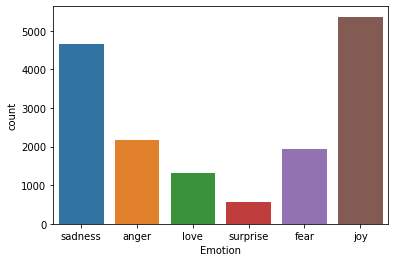

In [42]:
sns.countplot(x=train_df['Emotion'])
plt.show()

# **Stop Words**

In [43]:
stop_words = set(stopwords.words('english'))
temp_stop_words = set(stop_words)
for s in stop_words:
  temp_stop_words.add(s.replace('\'', ''))

stop_words = temp_stop_words

In [44]:
base_filters='\n\t!"#$%&()*+,-./:;<=>?[\]^_`{|}~ '

### **Filtering Stop Words of Training Data**

In [45]:
train_X_word_sequences = []
for i in train_df['Sentence']:
  i = str(i).replace('\'','')
  # Convert each sentence to sequence of words
  newlist = [x for x in text_to_word_sequence(i, filters=base_filters, lower=True)]
  # Filtering the stop words of each sentence
  filtered_sentence = [w for w in newlist if not w in stop_words]
  train_X_word_sequences.append(filtered_sentence)

### **Filtering Stop Words of Validation Data**

In [46]:
val_X_word_sequences = []
for i in val_df['Sentence']:
  i = str(i).replace('\'','')
  # Convert each sentence to sequence of words
  newlist = [x for x in text_to_word_sequence(i, filters=base_filters, lower=True)]
  # Filtering the stop words of each sentence
  filtered_sentence = [w for w in newlist if not w in stop_words]
  val_X_word_sequences.append(filtered_sentence)

# **Tokenization**

In [47]:
# Preparing a Tokenizer for vectorizing texts
tokenizer = Tokenizer(lower=True, oov_token='UNK')

In [48]:
# update the internal vocabulary based on the list of word sequences.
tokenizer.fit_on_texts(train_X_word_sequences)

In [49]:
# export the tokenizer
with open('/content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [50]:
len(tokenizer.word_index)

15044

### **Tokenizing Training Data**

In [51]:
# Transforming each text in train sentence to a sequence of integers
# train_X = tokenizer.texts_to_sequences(train_df['Sentence'])
train_X = tokenizer.texts_to_sequences(train_X_word_sequences)

In [52]:
print(train_X)

[[2, 554], [31, 3, 374, 3336, 432, 44, 54, 1337, 1113], [5, 2900, 1012, 177, 2, 375, 322], [67, 3, 541, 3998, 7, 16, 3337], [3, 933], [17, 3, 10, 401, 209, 61], [17, 218, 7236, 92, 7237, 757, 17, 2317, 1241, 62, 1734, 39, 2, 4, 338], [2, 323, 19, 1538, 633, 89, 159, 261], [5097, 111, 2, 5097, 5098, 47, 46, 906, 3999], [2, 542], [2, 4, 20, 607, 423, 194, 22], [2, 364, 410, 324, 789, 711, 1735, 2901], [14, 5099, 8, 89, 2, 488], [2, 227, 339, 4000], [4001, 1539, 856, 152, 758, 7238, 1465, 88, 66, 8, 120, 2902, 19, 1621, 3338, 103, 97, 2318, 3339, 42, 10, 384], [2, 712, 907, 348], [6, 2, 349], [2, 33, 489, 8], [94, 3, 759, 5100, 266, 444, 1839, 1965, 5101, 5100, 7239], [2, 3340, 760, 1840, 53, 3341, 43, 142], [2, 385, 402, 75, 139, 68, 243, 68], [3, 176, 133, 115, 7240, 49, 2, 1966, 2319, 124, 1622, 1338, 1242, 137, 123, 608, 934, 26, 609], [3, 772, 808], [95, 49, 7241, 5102, 403, 3342, 195, 3, 228, 95, 49], [104, 2, 4, 386, 48, 315, 404, 132], [16, 23, 250, 189, 340, 2903, 1540, 7242, 555

### **Tokenizing Validation Data**

In [53]:
# Transforming each text in validation sentence to a sequence of integers
# val_X = tokenizer.texts_to_sequences(val_df['Sentence'])
val_X = tokenizer.texts_to_sequences(val_X_word_sequences)

In [54]:
print(val_X)

[[5, 3, 60, 153, 231, 108, 11122, 413], [2, 4, 16, 147, 495, 2583, 495, 1275, 969], [2, 4, 492, 1], [3, 438, 1170], [1131, 3, 519], [109, 2, 756, 137, 166], [3, 275, 95, 81, 202, 346], [2, 481, 317, 95, 171], [2, 56, 863, 2427, 53, 29], [2, 504, 292, 243], [2, 546, 569, 114], [14498, 7284, 1250, 1461, 147, 1182, 3, 58], [295, 126, 50, 44, 3, 1, 4968, 466], [3, 759], [710, 568, 4277, 696, 659, 3, 4, 456, 1741, 6550, 9258, 14495], [52, 148, 3, 222, 1646, 113, 1971, 317, 2901, 13636, 1, 2625, 1, 113], [2, 664, 60, 482, 46, 29, 10, 71], [7, 42, 4, 128, 6877, 1, 4696, 952, 1], [39, 158, 28, 6, 2, 6834, 1, 181, 297, 1271, 5777, 1, 3263, 308, 1330, 1614, 9717, 4336, 102, 8], [1850, 159, 145, 415, 856, 5, 3, 572], [7, 713, 25, 2, 494], [2, 100, 117, 5, 640, 117, 5, 1288, 1424, 1011, 877, 82], [2, 22, 52, 6, 561], [2, 4, 1589, 530, 2162, 8], [2, 380, 658, 1561, 77, 207, 135, 110, 754, 1258, 3022, 144], [2273, 9288, 6522, 5, 2560, 29, 847, 31, 11642, 610, 151, 3151, 264, 15, 505, 3, 445, 500, 59

# **Padding**

### **Padding Training Data**

In [55]:
# Padding the training sequences to the same length
train_X_pad = pad_sequences(train_X, maxlen=80, padding='post')

In [56]:
train_X_pad

array([[   2,  554,    0, ...,    0,    0,    0],
       [  31,    3,  374, ...,    0,    0,    0],
       [   5, 2900, 1012, ...,    0,    0,    0],
       ...,
       [   2,  217,   32, ...,    0,    0,    0],
       [   2,    4,  446, ...,    0,    0,    0],
       [   7,   62,    2, ...,    0,    0,    0]], dtype=int32)

### **Padding Validation Data**

In [57]:
# Padding the validation sequences to the same length
val_X_pad = pad_sequences(val_X, maxlen=80, padding='post')

In [58]:
val_X_pad

array([[  5,   3,  60, ...,   0,   0,   0],
       [  2,   4,  16, ...,   0,   0,   0],
       [  2,   4, 492, ...,   0,   0,   0],
       ...,
       [  2, 172, 234, ...,   0,   0,   0],
       [281,   2, 168, ...,   0,   0,   0],
       [  2,   4, 876, ...,   0,   0,   0]], dtype=int32)

# **Encoding**

Since the labels are string, they have to been converted to integer for training.


*   Label Encoding
*   One-hot Encoding



In [59]:
emotionToInt = {
    'joy':0,
    'anger':1,
    'love':2,
    'sadness':3,
    'fear':4,
    'surprise':5
    }

### **Enocding Training Data**

In [60]:
# Convert the training labels to integer and then convert the integer to binary class matrix
train_Y_one_hot = to_categorical(train_df['Emotion'].replace(emotionToInt))

In [61]:
train_Y_one_hot

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

### **Enocding Validation Data**

In [62]:
# Convert the validation labels to integer and then convert the integer to binary class matrix
val_Y_one_hot = to_categorical(val_df['Emotion'].replace(emotionToInt))

In [63]:
val_Y_one_hot

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

# **Classifying Model**

*   **(1st Layer) Embedding**
  * Representing words using a dense vector representation
*   **(2nd Layer) Dropout Regularization**
  * The randomly selected neurons are ignored during training
  * Reducing sensitive & Improving generalization
*   **(3rd & 4th Layer) Bidirectional with LSTM**
  * Long Short Term Memory (LSTM)
      * LSTM includes cell state and hidden state, so that the training is capable of leraning long-term and short-term dependencies.
  * Bidirectional Recurrent Neural Network (BRNN)
      * Allowing the network to have both forward and backward information about the sequence at every time
*   **(5th Layer) Dense softmax**
  * Dense Layer
      * Last layer, it is used for changing the dimensioins of the vector. 
  * Softmax Activiation
      * Defining output of the node, this time we used softmax function



In [64]:
# Defining the model use sequential model 
model = Sequential()

# Adding Embedding layer
# Embedding(size of the vocabulary, dimension of the dense embedding, length of input sequences)
model.add(Embedding(16000, 64, input_length=80))

# Adding Dropout Layer  
# Randomly set input unit to 0 with a freqency of 0.6 at each step during training time
model.add(Dropout(0.6))

# Adding Biredrectional with LSTM Layer
# Forward Layer
# Set dimensionality of the output space to 80
# Output sequence return the hidden state of all time step
model.add(Bidirectional(LSTM(80, return_sequences=True)))
# Backward Layer, set dimensionality of the output space to 160
model.add(Bidirectional(LSTM(160)))

# Adding Dense Layer with softmax activation
# The dimensionality of the output space is 6
model.add(Dense(6, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 64)            1024000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 64)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1926      
Total params: 1,529,606
Trainable params: 1,529,606
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
# Using Adam algorithm as the optimizer
# Loss function is categorical crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
# Fitting the training data and validation data to the sequential model
# Training Epoch is 12 
fitting = model.fit(train_X_pad,train_Y_one_hot,epochs=12,validation_data=(val_X_pad, val_Y_one_hot))

Epoch 1/12
500/500 [==============================] - 23s 38ms/step - loss: 1.4102 - accuracy: 0.4240 - val_loss: 0.5314 - val_accuracy: 0.8230
Epoch 2/12
500/500 [==============================] - 18s 35ms/step - loss: 0.4348 - accuracy: 0.8477 - val_loss: 0.2617 - val_accuracy: 0.9105
Epoch 3/12
500/500 [==============================] - 18s 35ms/step - loss: 0.2278 - accuracy: 0.9186 - val_loss: 0.2032 - val_accuracy: 0.9255
Epoch 4/12
500/500 [==============================] - 18s 35ms/step - loss: 0.1515 - accuracy: 0.9473 - val_loss: 0.2202 - val_accuracy: 0.9175
Epoch 5/12
500/500 [==============================] - 18s 35ms/step - loss: 0.1126 - accuracy: 0.9574 - val_loss: 0.2016 - val_accuracy: 0.9260
Epoch 6/12
500/500 [==============================] - 17s 35ms/step - loss: 0.1052 - accuracy: 0.9606 - val_loss: 0.2076 - val_accuracy: 0.9270
Epoch 7/12
500/500 [==============================] - 18s 35ms/step - loss: 0.0798 - accuracy: 0.9711 - val_loss: 0.1983 - val_accuracy:

# **Displaying the Training and Validation Result**

### **Accuracy of Training data and Validation**

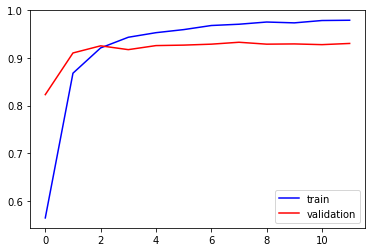

In [67]:
plt.plot(fitting.history['accuracy'],c='b',label='train')
plt.plot(fitting.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

### **Loss of Training data and Validation**

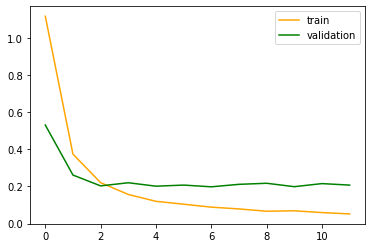

In [68]:
plt.plot(fitting.history['loss'],c='orange',label='train')
plt.plot(fitting.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

# **Save Model**

Saving the trained model for the UI program development

In [69]:
model.save('/content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/COMP5423_Lab1_model.tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/COMP5423_Lab1_model.tf/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/COMP5423_Lab1_model.tf/assets


# **Predict Test Data**

In [70]:
# use the trainned model to predict the test data
model = load_model('/content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/COMP5423_Lab1_model.tf')

In [71]:
# Preprocessing the test data before the classification
def predict(location, filename, test_data):
  f = open(location+filename+".txt", "w")
  test_X_word_sequences = []
  for i in test_data:
    i = str(i).replace('\'','')
    # Convert each sentence to sequence of words
    newlist = [x for x in text_to_word_sequence(i, filters=base_filters, lower=True)]
    # Filtering the stop words of each sentence
    filtered_sentence = [w for w in newlist if not w in stop_words]
    test_X_word_sequences.append(filtered_sentence)

  # tokenize the setence
  sentence_seq = tokenizer.texts_to_sequences(test_X_word_sequences)
  # padding to the same size 
  sentence_pad = pad_sequences(sentence_seq, maxlen=80, padding='post')
  predict_result = model.predict_classes(sentence_pad)
  # print(predict_result)
  for result in predict_result:
    for emotionLabel, emotionVal in emotionToInt.items():
      if (emotionVal == result):
        # return emotionLabel
        f.write(emotionLabel+"\n")

In [72]:
start_time = time.time()
predict("/content/drive/MyDrive/Colab Notebooks/COMP5423_Lab1_HW/data/", "test_prediction", test_df["Sentence"])
end_time = time.time()
print("The prediction need", end_time-start_time, "seconds.")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The prediction need 1.8177974224090576 seconds.
